### Carregar os Dados ###

In [1]:
import pandas as pd

# Criar os dados fictícios
data = {
    "id": [1, 2, 3, 4, 5],
    "product": ["Product A", "Product B", "Product C", "Product D", "Product E"],
    "category": ["Category 1", "Category 1", "Category 2", "Category 2", "Category 1"],
    "region": ["North", "North", "South", "South", "North"],
    "sales_amount": [100, 200, 300, 400, 150],
    "transaction_date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"]
}

# Criar DataFrame
df = pd.DataFrame(data)
print(df)


   id    product    category region  sales_amount transaction_date
0   1  Product A  Category 1  North           100       2023-01-01
1   2  Product B  Category 1  North           200       2023-01-02
2   3  Product C  Category 2  South           300       2023-01-03
3   4  Product D  Category 2  South           400       2023-01-04
4   5  Product E  Category 1  North           150       2023-01-05


### Análises Básicas ###

**3.1. Estatísticas Descritivas**

Use o método ```.describe()``` para obter um resumo estatístico:

In [2]:
print("Resumo Estatístico:")
print(df.describe())

Resumo Estatístico:
             id  sales_amount
count  5.000000      5.000000
mean   3.000000    230.000000
std    1.581139    120.415946
min    1.000000    100.000000
25%    2.000000    150.000000
50%    3.000000    200.000000
75%    4.000000    300.000000
max    5.000000    400.000000


**3.2. Agrupamento e Soma**

Calcular a soma de vendas por região:

In [3]:
sales_by_region = df.groupby("region")["sales_amount"].sum()
print("Soma de Vendas por Região:")
print(sales_by_region)

Soma de Vendas por Região:
region
North    450
South    700
Name: sales_amount, dtype: int64


**3.3 Filtro de Dados**

Filtrar produtos com vendas acima de 200

In [4]:
filtered_df = df[df["sales_amount"] > 200]
print("Produtos com vendas acima de 200:")
print(filtered_df)

Produtos com vendas acima de 200:
   id    product    category region  sales_amount transaction_date
2   3  Product C  Category 2  South           300       2023-01-03
3   4  Product D  Category 2  South           400       2023-01-04


### Transformações no DataFrame ###

**4.1. Criar Novas Colunas**

Adicionar uma coluna com o percentual de vendas em relação ao total:

In [6]:
# Calculando o percentual de vendas
df["sales_percentage"] = (df["sales_amount"] / df["sales_amount"].sum()) * 100

# Formatando a coluna de percentual como string com "%"
df["sales_percentage"] = df["sales_percentage"].apply(lambda x: f"{x:.2f}%")

# Exibindo o DataFrame
print("Percentual de Vendas:")
print(df)


Percentual de Vendas:
   id    product    category region  sales_amount transaction_date  \
0   1  Product A  Category 1  North           100       2023-01-01   
1   2  Product B  Category 1  North           200       2023-01-02   
2   3  Product C  Category 2  South           300       2023-01-03   
3   4  Product D  Category 2  South           400       2023-01-04   
4   5  Product E  Category 1  North           150       2023-01-05   

  sales_percentage  
0            8.70%  
1           17.39%  
2           26.09%  
3           34.78%  
4           13.04%  


**4.2. Soma Acumulada**

Adicionar uma coluna com a soma acumulada das vendas por região:

In [7]:
df["running_total"] = df.groupby("region")["sales_amount"].cumsum()
print("Soma Acumulada:")
print(df)

Soma Acumulada:
   id    product    category region  sales_amount transaction_date  \
0   1  Product A  Category 1  North           100       2023-01-01   
1   2  Product B  Category 1  North           200       2023-01-02   
2   3  Product C  Category 2  South           300       2023-01-03   
3   4  Product D  Category 2  South           400       2023-01-04   
4   5  Product E  Category 1  North           150       2023-01-05   

  sales_percentage  running_total  
0            8.70%            100  
1           17.39%            300  
2           26.09%            300  
3           34.78%            700  
4           13.04%            450  


### Visualizações ###

**5.2. Gráfico de Barras**

Visualizar vendas por região:

In [10]:
!pip install seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

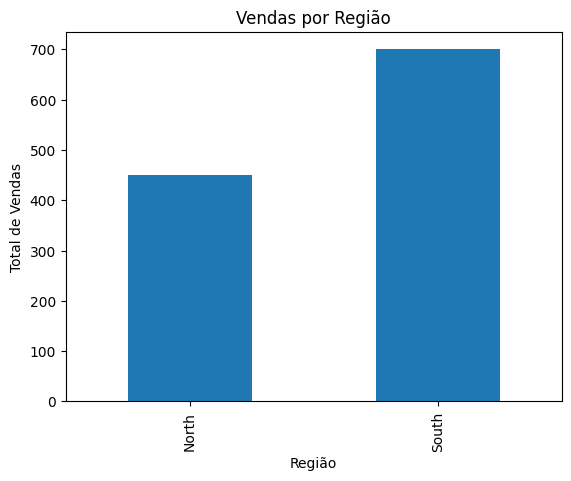

In [12]:
sales_by_region.plot(kind="bar", title="Vendas por Região")
plt.xlabel("Região")
plt.ylabel("Total de Vendas")
plt.show()

**5.3. Gráfico de Linhas**

Visualizar a soma acumulada das vendas:

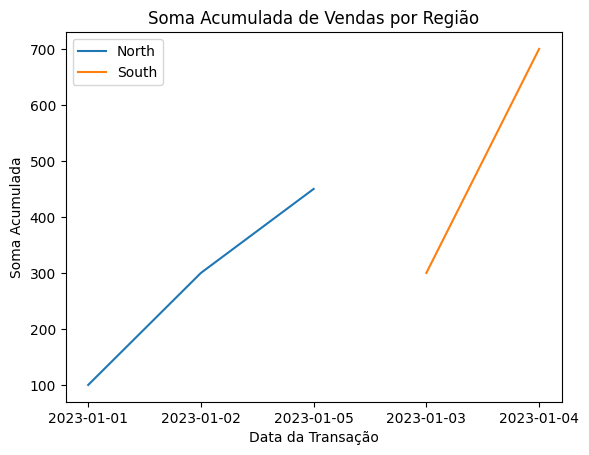

In [13]:
for region, group in df.groupby("region"):
    plt.plot(group["transaction_date"], group["running_total"], label=region)

plt.title("Soma Acumulada de Vendas por Região")
plt.xlabel("Data da Transação")
plt.ylabel("Soma Acumulada")
plt.legend()
plt.show()

**5.4. Gráfico de Dispersão**

Visualizar a relação entre vendas e categorias:

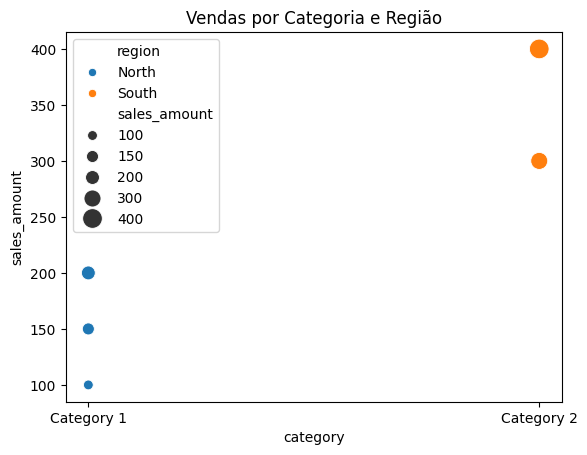

In [14]:
sns.scatterplot(data=df, x="category", y="sales_amount", hue="region", size="sales_amount", sizes=(50, 200))
plt.title("Vendas por Categoria e Região")
plt.show()

**6. Exportar os Dados**

Se quiser salvar o DataFrame modificado ou os resultados para um arquivo CSV:

In [15]:
df.to_csv("sales_analysis.csv", index=False)
print("Arquivo salvo como 'sales_analysis.csv'")


Arquivo salvo como 'sales_analysis.csv'
